# Multi Layer Peceptron
No use of `pytorch-lightning`

Creating a Multi Layer Peceptron (MLP) also know as a feed forward network

In [54]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Use GPU cuda if available, if not the cpu will be used

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Create train and test datasets
Creating train and test datasets of the MNIST data from pytorch. This data gets transformed to pytoch Tensors

In [56]:
train_dataset = torchvision.datasets.MNIST(
    root='/MNIST/data', 
    train=True, 
    transform=transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root='/MNIST/data', 
    train=False, 
    transform=transforms.ToTensor(),
    download=True)

## Create train and test dataloaders
Creating train and test dataloaders

In [57]:
batch_size = 100

# Create training dataloader
train_dl = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Create test dataloader
test_dl = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Printed out the amount of samples that a batch will return, with the amount of channels, width and height of the image.

torch.Size([100, 1, 28, 28]) torch.Size([100])


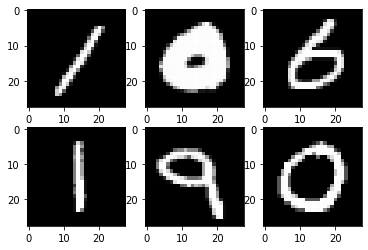

In [58]:
examples_iter = iter(train_dl)
examples, examples_labels = examples_iter.next()

print(examples.shape, examples_labels.shape)

# Plot examples of the data
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(examples[i][0], cmap='gray')
plt.show()

## Create model

In [59]:
class MultiLayerPeceptron(nn.Module):
    def __init__(self) -> None:
        super(MultiLayerPeceptron, self).__init__()
        # Create Linear layer
        self.l1 = nn.Linear(28 * 28, 512)
        # Set activation function
        self.relu = nn.ReLU()
        # Set ouput layer
        self.l2 = nn.Linear(512, 10)
    
    def forward(self, x):
        # Reshape images because shape is [100, 1, 28, 28] and it needs to become [100, 784] the same as the input size of the model
        x = x.reshape(-1, 28*28)
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)

        return out

model = MultiLayerPeceptron()

## Set loss function

In [60]:
citerion = nn.CrossEntropyLoss()

## Set optimizer

In [61]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Training the model
Training the model with the train dataloader

In [62]:
n_epochs = 3
n_total_steps = len(train_dl)

for epoch in range(n_epochs):
    for i, (images, labels) in enumerate(train_dl):
        # Reshape images because shape is [100, 1, 28, 28] and it needs to become [100, 784] the same as the input size of the model
        # images = images.reshape(-1, 28*28)

        # Forward
        output = model(images)

        # Loss
        loss = citerion(output, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        # Update the parameters
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"epoch: {epoch+1}/{n_epochs}, step: {i+1}/{n_total_steps}, loss: {loss.item():.4f}")

epoch: 1/3, step: 100/600, loss: 0.2830
epoch: 1/3, step: 200/600, loss: 0.2523
epoch: 1/3, step: 300/600, loss: 0.3485
epoch: 1/3, step: 400/600, loss: 0.1565
epoch: 1/3, step: 500/600, loss: 0.2543
epoch: 1/3, step: 600/600, loss: 0.1112
epoch: 2/3, step: 100/600, loss: 0.1123
epoch: 2/3, step: 200/600, loss: 0.1361
epoch: 2/3, step: 300/600, loss: 0.0970
epoch: 2/3, step: 400/600, loss: 0.0874
epoch: 2/3, step: 500/600, loss: 0.1109
epoch: 2/3, step: 600/600, loss: 0.1011
epoch: 3/3, step: 100/600, loss: 0.0709
epoch: 3/3, step: 200/600, loss: 0.0409
epoch: 3/3, step: 300/600, loss: 0.0728
epoch: 3/3, step: 400/600, loss: 0.0414
epoch: 3/3, step: 500/600, loss: 0.1507
epoch: 3/3, step: 600/600, loss: 0.0709


## Test model
Get the accuracy of the model with the test dataloader

In [63]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, labels in test_dl:
        output = model(images)

        # Return value and index 
        _, predictions = torch.max(output, 1)

        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100 * n_correct / n_samples
    print(f"accuracy: {acc}")


accuracy: 97.6
